# [NTDS'18] tutorial 6: linear algebra for graphs and networkx
[ntds'18]: https://github.com/mdeff/ntds_2018

[Benjamin Ricaud](https://people.epfl.ch/benjamin.ricaud), [EPFL LTS2](https://lts2.epfl.ch)

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 1 The gradient, incidence and Laplacian matrices

### 1.1 Simple unweighted, undirected graph: the path graph

A first simple example to understand the definition of these matrices and their relationships.

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


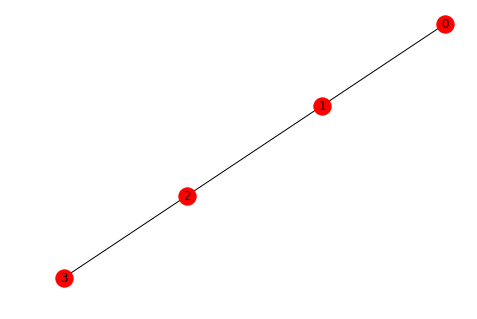

In [2]:
Gl = nx.path_graph(4)
nx.draw(Gl, with_labels=True)

In [3]:
A = nx.adjacency_matrix(Gl)
A.todense() # numpy matrix

matrix([[0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]], dtype=int64)

In [4]:
S = nx.incidence_matrix(Gl, oriented=True)
S.todense()

matrix([[-1.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  1.]])

In [5]:
S.dot(S.T).todense()

matrix([[ 1., -1.,  0.,  0.],
        [-1.,  2., -1.,  0.],
        [ 0., -1.,  2., -1.],
        [ 0.,  0., -1.,  1.]])

In [6]:
L = nx.laplacian_matrix(Gl)
L.todense()

matrix([[ 1, -1,  0,  0],
        [-1,  2, -1,  0],
        [ 0, -1,  2, -1],
        [ 0,  0, -1,  1]], dtype=int64)

$ SS^\top=L$
and here $\nabla = S^\top$.

$S$ is defined only for the case of unweighted graphs.

### 1.2 General definition of the gradient

Let $\cal{V}$ be the vertex set and $\cal{E}$ the edge set.
The gradient $\nabla: \cal{V}\to \cal{E}$ is defined as follows:
$$(\nabla f)[i,j] = \sqrt{w_{ij}}(f[j]-f[i]),
$$
where $f\in\cal{V}$ and $w_{ij}$ is the edge weight between nodes $i$ and $j$.

Let us justify this definition.

### 1.3 Connection with the standard discrete setting

A one-dimensional regularly sampled signal can be seen as a signal on a path graph.

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


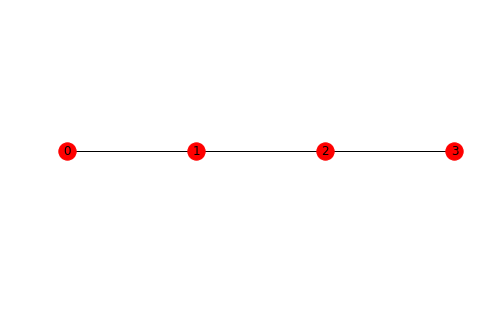

In [7]:
# Let us build the path graph again
Gl = nx.path_graph(4)
pos = dict((n,(n,0)) for n in Gl.nodes())
nx.draw(Gl, pos, with_labels=True)

An example of a function and its gradient.

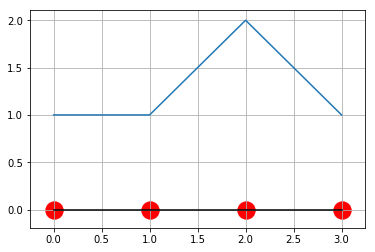

In [8]:
# Example of a function on the nodes
f = [1, 1, 2, 1]
# Plot the function
plt.plot(f)
# plot the path graph
plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'k')  # black line
plt.scatter(*zip(*pos.values()), c='r', s=300)  # red dots
plt.grid()

The standard gradient is:
$$f'[1]=\nabla f[1] = \frac{f[2]-f[1]}{\delta x}.
$$
Let $w=1/\delta x^2$.  We have in matrix form:
$$\nabla =\left(\begin{matrix} -1& 1&0&0\\0 &-1&1&0\\0&0&-1&1\\0&0&0&-1 \end{matrix}\right)\times \frac{1}{dx} = 
\left(\begin{matrix} -\sqrt{w}& \sqrt{w}&0&0\\0 &-\sqrt{w}&\sqrt{w}&0\\0&0&-\sqrt{w}&\sqrt{w}\\0&0&0&-\sqrt{w} \end{matrix}\right).
$$
Here, it is a $4\times 4$ matrix (4 nodes).

$$\nabla f = 
\left(\begin{matrix} -\sqrt{w}& \sqrt{w}&0&0\\0 &-\sqrt{w}&\sqrt{w}&0\\0&0&-\sqrt{w}&\sqrt{w}\\0&0&0&-\sqrt{w} \end{matrix}\right)\left(\begin{matrix}f[0]\\f[1]\\f[2]\\f[3] \end{matrix}\right)=\left(\begin{matrix}f[1]-f[0]\\f[2]-f[1]\\f[3]-f[2]\\-f[3] \end{matrix}\right)\times \sqrt{w}.
$$
The transpose gives:
$$\nabla^\top f[1] = \frac{f[0]-f[1]}{\delta x}
$$

Problem:

* You have to define boundary conditions (periodic, infinite line,...), or have the same number of edges and nodes.

This is solved if the gradient is defined on the edges.

**Remark:** we could have $f'[1] = \frac{f[1]-f[0]}{\delta x}$, depending on the convention.

What about the Laplacian (seen as the second derivative)?
$$ L f[1]= \nabla^\top(\nabla f)[1] = \frac{f'[0]-f'[1]}{\delta x}=\frac{f[1]-f[0] - (f[2]-f[1])}{\delta x^2} = w(f[1]-f[0])+w(f[1]-f[2])
$$

### 1.4 A graph with weights

In [9]:
# Let us change the weights of the path graph
Aw = A.copy()
Aw[0, 1] = 2
Aw[1, 0] = 2
Aw[1, 2] = 10
Aw[2, 1] = 10

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


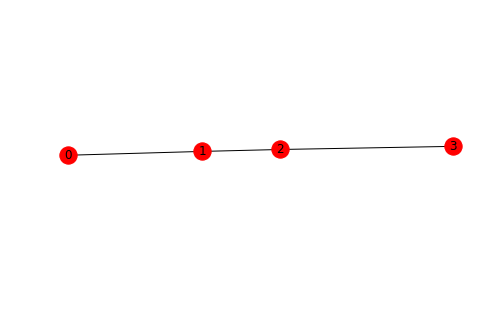

In [10]:
Gw = nx.from_numpy_array(Aw.todense())
nx.draw(Gw, with_labels=True)

In [11]:
S = nx.incidence_matrix(Gw, oriented=True, weight='weight')
S.todense()

matrix([[ -2.,   0.,   0.],
        [  2., -10.,   0.],
        [  0.,  10.,  -1.],
        [  0.,   0.,   1.]])

In [12]:
S.dot(S.T).todense()

matrix([[   4.,   -4.,    0.,    0.],
        [  -4.,  104., -100.,    0.],
        [   0., -100.,  101.,   -1.],
        [   0.,    0.,   -1.,    1.]])

In [13]:
L = nx.laplacian_matrix(Gw)
L.todense()

matrix([[  2,  -2,   0,   0],
        [ -2,  12, -10,   0],
        [  0, -10,  11,  -1],
        [  0,   0,  -1,   1]], dtype=int64)

The definitions do not match any more in this case.

### 1.5 A directed graph example

In [14]:
Gld = nx.path_graph(4, create_using=nx.DiGraph())

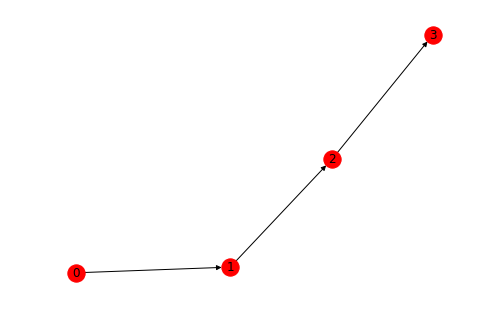

In [15]:
nx.draw(Gld, with_labels=True)

In [16]:
nx.incidence_matrix(Gld, oriented=True).todense()

matrix([[-1.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  1.]])

In [17]:
nx.adjacency_matrix(Gld).todense()

matrix([[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]], dtype=int64)

In [18]:
nx.laplacian_matrix(Gld)
# Not implemented!

NetworkXNotImplemented: not implemented for directed type

### 1.6 How to compute the gradient?

Let $N$ be the number of nodes and $E$ the number of edges.

Remarks:
* The weight matrix is a $N\times N$ matrix where the entries are edge weights.
* For each edge the gradient is $\nabla f [i,j] = \sqrt{w_{ij}}(f(j)-f(i))$.
* The gradient matrix is of size $E\times N$.

Construct the Gradient matrix by iterating over the row and columns of the adjacency matrix.

<Figure size 144x144 with 0 Axes>

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


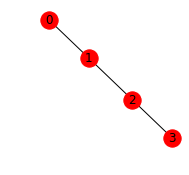

In [19]:
# Let us load the path graph again
Gl = nx.path_graph(4)
A = nx.adj_matrix(Gl)
A = A.todense()
plt.figure(figsize=(2, 2))
nx.draw(Gl, with_labels=True)

In [20]:
print('Weight matrix')
print(A)

Weight matrix
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


Exercice: compute the gradient of this graph.

In [21]:
# Let us compute the gradient
N = A.shape[0]  # number of nodes
E = np.sum(A>0)  # number of edges (non-zero entries of A)
gradient = np.zeros((E, N))
eij = 0  # edge index
for i in range(N):
    for j in range(N):
        wij = A[i, j]
        if wij > 0:
            print('Edge ({},{}) has index {} and weight {}.'.format(i, j, eij, wij))
            eij = eij + 1  # increment the edge index

Edge (0,1) has index 0 and weight 1.
Edge (1,0) has index 1 and weight 1.
Edge (1,2) has index 2 and weight 1.
Edge (2,1) has index 3 and weight 1.
Edge (2,3) has index 4 and weight 1.
Edge (3,2) has index 5 and weight 1.


**Remark:** it is twice the number of edges expected!

2 points of view:

* You discard half of the edges (choose a direction for each edge) or,

* You can see an undirected edge as a sum of 2 directed edges in opposite directions, but you have to divide by 2 for the Laplacian:
$$L = \frac{1}{2} \nabla^\top \nabla.$$

In [22]:
L = nx.laplacian_matrix(Gl)

Compare the laplacian obtained from your gradient and the laplacian given by networkx.

In [23]:
# Exercise

## 3 Eigenvectors and their visualization

### 3.1 The grid graph

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


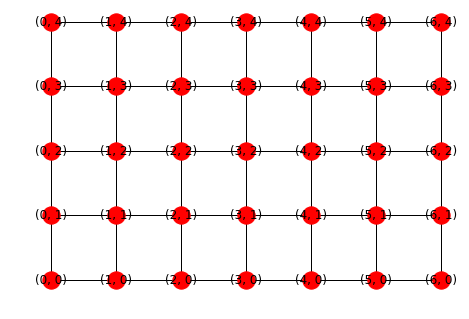

In [24]:
# Let us build a 2d grid graph
nb_rows, nb_cols = 5, 7
Gd = nx.grid_2d_graph(nb_cols, nb_rows, periodic=False)#True)
Ad = nx.adjacency_matrix(Gd)
# Choose regular positions
pos = dict((n, n) for n in Gd.nodes())
#nx.draw_networkx(Gd)
nx.draw(Gd, pos, with_labels=True)

Remark: networkx function `grid_2d_graph` label nodes with their 2d coordinates (i,j).

### 3.2 Function on a graph

A "Dirac delta" function is a function that is zero everywhere except at one point.

In [25]:
nb_nodes = nb_rows * nb_cols
f = np.zeros((nb_nodes, 1))
peak_position = 5
f[peak_position] = 1

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Dirac delta at position 5')

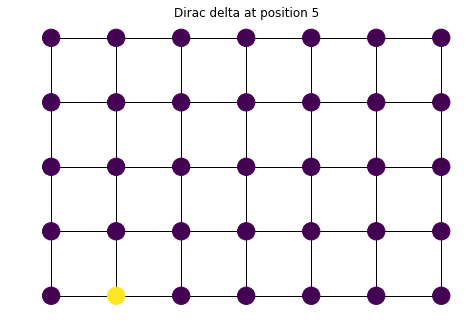

In [26]:
nx.draw(Gd, pos,node_color=f.flatten())
plt.title('Dirac delta at position ' + str(peak_position))

In [27]:
L = nx.laplacian_matrix(Gd)
eigval, eigvect = np.linalg.eigh(L.todense())

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


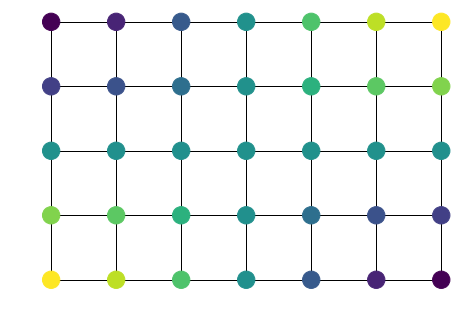

In [28]:
u_k = np.array(eigvect[:, 3]).flatten()
nx.draw(Gd, pos, node_color=u_k)

In [29]:
u_k

array([ 3.13454713e-01,  1.93725666e-01,  5.55111512e-17, -1.93725666e-01,
       -3.13454713e-01,  2.51371162e-01,  1.55355922e-01, -1.38777878e-16,
       -1.55355922e-01, -2.51371162e-01,  1.39500471e-01,  8.62160324e-02,
       -7.20321680e-17, -8.62160324e-02, -1.39500471e-01, -2.98372438e-16,
       -5.81816545e-17,  3.32152112e-16,  3.61191787e-16,  3.87400344e-16,
       -1.39500471e-01, -8.62160324e-02,  2.77555756e-17,  8.62160324e-02,
        1.39500471e-01, -2.51371162e-01, -1.55355922e-01,  9.02056208e-17,
        1.55355922e-01,  2.51371162e-01, -3.13454713e-01, -1.93725666e-01,
       -4.29344060e-17,  1.93725666e-01,  3.13454713e-01])

### 3.3 An irregular graph

Let us see what are the eigenvectors of the Barbell graph.
You can try other graphs in the [networkx list](https://networkx.github.io/documentation/stable/reference/generators.html).

For drawing the graph you can use [networkx graph layouts](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout). For example, `spectral_layout` gives the Laplacian eigenmaps.

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


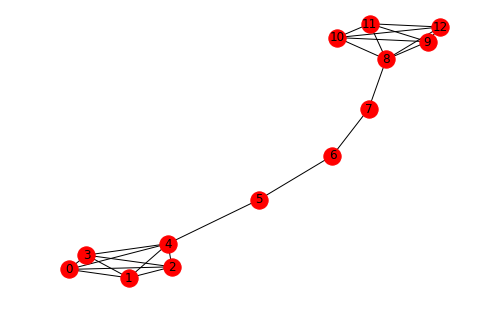

In [30]:
Gb = nx.barbell_graph(5, 3)
#nx.draw(Gb, pos=posGb, with_labels=True)
posGb = nx.spring_layout(Gb)
nx.draw(Gb, pos=posGb, with_labels=True)

In [31]:
Lb = nx.laplacian_matrix(Gb)
eigval, eigvect = np.linalg.eigh(Lb.todense())

/home/michael/.conda/envs/ntds_2018/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


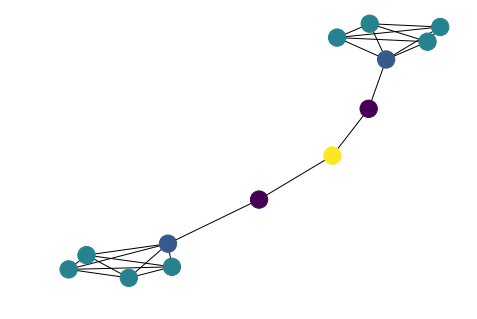

In [32]:
u_k = np.array(eigvect[:, 4]).flatten()
nx.draw(Gb, pos=posGb, node_color=u_k)

Some eigenvectors are peaky!

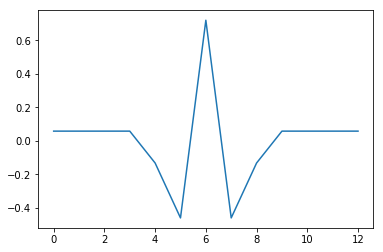

In [33]:
plt.plot(u_k)